#Dataset

In [1]:
import tensorflow as tf
print(tf.__version__)

2.12.0


In [4]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()
assert X_train.shape == (60000, 28, 28)
assert X_test.shape == (10000, 28, 28)
assert y_train.shape == (60000,)
assert y_test.shape == (10000,)

In [15]:
class_name = ['Polo', 'Pantalon', 'Pull-over', 'Vestido', 'Abrigo', 'Sandalias',
              'Camisa', 'Zapatillas', 'Bolso', 'Botines']

In [7]:
print(y_train[1])
print(X_train[1])

0
[[  0   0   0   0   0   1   0   0   0   0  41 188 103  54  48  43  87 168
  133  16   0   0   0   0   0   0   0   0]
 [  0   0   0   1   0   0   0  49 136 219 216 228 236 255 255 255 255 217
  215 254 231 160  45   0   0   0   0   0]
 [  0   0   0   0   0  14 176 222 224 212 203 198 196 200 215 204 202 201
  201 201 209 218 224 164   0   0   0   0]
 [  0   0   0   0   0 188 219 200 198 202 198 199 199 201 196 198 198 200
  200 200 200 201 200 225  41   0   0   0]
 [  0   0   0   0  51 219 199 203 203 212 238 248 250 245 249 246 247 252
  248 235 207 203 203 222 140   0   0   0]
 [  0   0   0   0 116 226 206 204 207 204 101  75  47  73  48  50  45  51
   63 113 222 202 206 220 224   0   0   0]
 [  0   0   0   0 200 222 209 203 215 200   0  70  98   0 103  59  68  71
   49   0 219 206 214 210 250  38   0   0]
 [  0   0   0   0 247 218 212 210 215 214   0 254 243 139 255 174 251 255
  205   0 215 217 214 208 220  95   0   0]
 [  0   0   0  45 226 214 214 215 224 205   0  42  35  60  16 

In [8]:
import matplotlib.pyplot as plt
import random

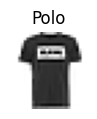

In [14]:
plt.figure(figsize=(1, 1))
plt.imshow(X_train[1], cmap=plt.cm.binary)
plt.title(class_name[y_train[1]])
plt.axis(False)
plt.show()

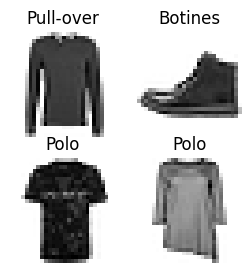

In [19]:
plt.figure(figsize=(3, 3))
for i in range(4):
  ax = plt.subplot(2, 2, i + 1)
  index = random.choice(range(len(X_train)))
  plt.imshow(X_train[index], cmap=plt.cm.binary)
  plt.title(class_name[y_train[index]])
  plt.axis(False)
plt.show()

# Preprocesamiento

In [20]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train,
                                                  test_size=0.16,
                                                  stratify=y_train,
                                                  random_state=0)
print(X_train.shape, X_val.shape, y_train.shape, y_val.shape)

(50400, 28, 28) (9600, 28, 28) (50400,) (9600,)


# Entrenamiento


| **Hiperparameter** | **Clasificacion binaria** | **Clasificacion multiple** |
| --- | --- | --- |
| Capas ocultas | Minimo 1, maximo = ilimitado | Igual que la clasificacion Binaria |
| Neuronas por capa | Dependiendo del problema pero por lo general de 10 a 100 | Igual que la clasificacion Binaria |
| Capa de salida | Salida de una neurona | Una neurona por clase |
| Funcion de activacion - Capas ocultas | Usualmente [ReLU](https://www.kaggle.com/dansbecker/rectified-linear-units-relu-in-deep-learning) (rectified linear unit) | Igual que la clasificacion Binaria |
| Funcion de activacion - Capa de salida | [Sigmoid](https://en.wikipedia.org/wiki/Sigmoid_function) | [Softmax](https://en.wikipedia.org/wiki/Softmax_function) |
| Funcion de perdida | [Cross entropy](https://en.wikipedia.org/wiki/Cross_entropy#Cross-entropy_loss_function_and_logistic_regression) ([`tf.keras.losses.BinaryCrossentropy`](https://www.tensorflow.org/api_docs/python/tf/keras/losses/BinaryCrossentropy) in TensorFlow) | Cross entropy ([`CategoricalCrossentropy`](https://www.tensorflow.org/api_docs/python/tf/keras/losses/CategoricalCrossentropy) [`SparseCategoricalCrossentropy`](https://www.tensorflow.org/api_docs/python/tf/keras/losses/SparseCategoricalCrossentropy) in TensorFlow) |
| Optimizer | [SGD](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/SGD) (stochastic gradient descent), [Adam](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/Adam) | Igual que la clasificacion Binaria |

In [26]:
tf.random.set_seed(42)

model_1 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(len(class_name), activation='softmax')
])

model_1.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense (Dense)               (None, 100)               78500     
                                                                 
 dense_1 (Dense)             (None, 100)               10100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 89,610
Trainable params: 89,610
Non-trainable params: 0
_________________________________________________________________


In [27]:
model_1_history = model_1.fit(X_train, y_train,
                              epochs=10,
                              validation_data=(X_val, y_val))

Epoch 1/10
1575/1575 [==============================] - 11s 3ms/step - loss: 0.5023 - accuracy: 0.8207 - val_loss: 0.3831 - val_accuracy: 0.8573
Epoch 2/10
1575/1575 [==============================] - 5s 3ms/step - loss: 0.3767 - accuracy: 0.8639 - val_loss: 0.3890 - val_accuracy: 0.8536
Epoch 3/10
1575/1575 [==============================] - 5s 3ms/step - loss: 0.3421 - accuracy: 0.8747 - val_loss: 0.3497 - val_accuracy: 0.8735
Epoch 4/10
1575/1575 [==============================] - 5s 3ms/step - loss: 0.3162 - accuracy: 0.8842 - val_loss: 0.3231 - val_accuracy: 0.8828
Epoch 5/10
1575/1575 [==============================] - 5s 3ms/step - loss: 0.2990 - accuracy: 0.8889 - val_loss: 0.3337 - val_accuracy: 0.8797
Epoch 6/10
1575/1575 [==============================] - 5s 3ms/step - loss: 0.2843 - accuracy: 0.8935 - val_loss: 0.3118 - val_accuracy: 0.8902
Epoch 7/10
1575/1575 [==============================] - 6s 4ms/step - loss: 0.2737 - accuracy: 0.8974 - val_loss: 0.3067 - val_accuracy

In [28]:
import pandas as pd

<Axes: >

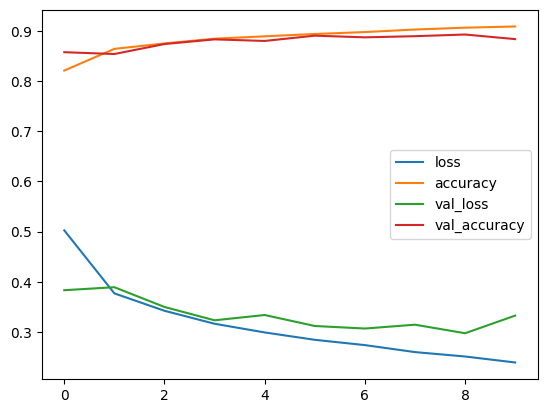

In [29]:
pd.DataFrame(model_1_history.history).plot()

# Buscando el mejor learning rate

In [30]:
import numpy as np

In [31]:
EPOCH = 40

In [33]:
numeros_aleatorios = np.arange(EPOCH) / 20
numeros_aleatorios

array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
       0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  , 1.05,
       1.1 , 1.15, 1.2 , 1.25, 1.3 , 1.35, 1.4 , 1.45, 1.5 , 1.55, 1.6 ,
       1.65, 1.7 , 1.75, 1.8 , 1.85, 1.9 , 1.95])

In [34]:
lrs = 1e-3 * 10**numeros_aleatorios
lrs

array([0.001     , 0.00112202, 0.00125893, 0.00141254, 0.00158489,
       0.00177828, 0.00199526, 0.00223872, 0.00251189, 0.00281838,
       0.00316228, 0.00354813, 0.00398107, 0.00446684, 0.00501187,
       0.00562341, 0.00630957, 0.00707946, 0.00794328, 0.00891251,
       0.01      , 0.01122018, 0.01258925, 0.01412538, 0.01584893,
       0.01778279, 0.01995262, 0.02238721, 0.02511886, 0.02818383,
       0.03162278, 0.03548134, 0.03981072, 0.04466836, 0.05011872,
       0.05623413, 0.06309573, 0.07079458, 0.07943282, 0.08912509])

In [35]:
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(len(class_name), activation='softmax')
])

model_2.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 100)               78500     
                                                                 
 dense_4 (Dense)             (None, 100)               10100     
                                                                 
 dense_5 (Dense)             (None, 10)                1010      
                                                                 
Total params: 89,610
Trainable params: 89,610
Non-trainable params: 0
_________________________________________________________________


In [37]:
def scheduler(epoch, lr):
  return lrs[epoch]

lr_callback = tf.keras.callbacks.LearningRateScheduler(scheduler)

model_2_history = model_2.fit(X_train, y_train,
                              epochs=EPOCH,
                              validation_data=(X_val, y_val), 
                              callbacks=[lr_callback])

Epoch 1/40
1575/1575 [==============================] - 5s 3ms/step - loss: 0.3702 - accuracy: 0.8667 - val_loss: 0.3482 - val_accuracy: 0.8712 - lr: 0.0010
Epoch 2/40
1575/1575 [==============================] - 6s 4ms/step - loss: 0.3450 - accuracy: 0.8736 - val_loss: 0.3589 - val_accuracy: 0.8659 - lr: 0.0011
Epoch 3/40
1575/1575 [==============================] - 5s 3ms/step - loss: 0.3266 - accuracy: 0.8788 - val_loss: 0.3663 - val_accuracy: 0.8654 - lr: 0.0013
Epoch 4/40
1575/1575 [==============================] - 6s 4ms/step - loss: 0.3165 - accuracy: 0.8826 - val_loss: 0.3193 - val_accuracy: 0.8829 - lr: 0.0014
Epoch 5/40
1575/1575 [==============================] - 5s 3ms/step - loss: 0.3075 - accuracy: 0.8854 - val_loss: 0.3610 - val_accuracy: 0.8652 - lr: 0.0016
Epoch 6/40
1575/1575 [==============================] - 5s 3ms/step - loss: 0.3023 - accuracy: 0.8874 - val_loss: 0.3402 - val_accuracy: 0.8768 - lr: 0.0018
Epoch 7/40
1575/1575 [==============================] - 6s

Text(0, 0.5, 'Loss')

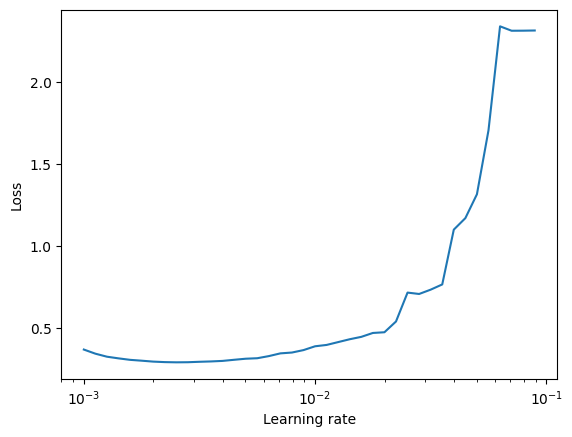

In [38]:
plt.semilogx(lrs, model_2_history.history['loss'])
plt.xlabel('Learning rate')
plt.ylabel('Loss')

In [39]:
10**-3

0.001

# Seleccionar los mejores pesos

In [40]:
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(len(class_name), activation='softmax')
])

model_3.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=['accuracy'])

model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_6 (Dense)             (None, 100)               78500     
                                                                 
 dense_7 (Dense)             (None, 100)               10100     
                                                                 
 dense_8 (Dense)             (None, 10)                1010      
                                                                 
Total params: 89,610
Trainable params: 89,610
Non-trainable params: 0
_________________________________________________________________


In [42]:
checkpoint_filepath = '/tmp/checkpoint' 

checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True
)

model_3_history = model_3.fit(X_train, y_train,
                              epochs=EPOCH,
                              validation_data=(X_val, y_val), 
                              callbacks=[checkpoint_callback])

Epoch 1/40
1575/1575 [==============================] - 6s 3ms/step - loss: 0.5082 - accuracy: 0.8183 - val_loss: 0.3953 - val_accuracy: 0.8549
Epoch 2/40
1575/1575 [==============================] - 6s 4ms/step - loss: 0.3784 - accuracy: 0.8619 - val_loss: 0.3873 - val_accuracy: 0.8557
Epoch 3/40
1575/1575 [==============================] - 5s 3ms/step - loss: 0.3441 - accuracy: 0.8740 - val_loss: 0.3628 - val_accuracy: 0.8657
Epoch 4/40
1575/1575 [==============================] - 5s 3ms/step - loss: 0.3191 - accuracy: 0.8832 - val_loss: 0.3353 - val_accuracy: 0.8780
Epoch 5/40
1575/1575 [==============================] - 5s 3ms/step - loss: 0.2999 - accuracy: 0.8872 - val_loss: 0.3497 - val_accuracy: 0.8721
Epoch 6/40
1575/1575 [==============================] - 6s 4ms/step - loss: 0.2853 - accuracy: 0.8919 - val_loss: 0.3212 - val_accuracy: 0.8873
Epoch 7/40
1575/1575 [==============================] - 6s 4ms/step - loss: 0.2748 - accuracy: 0.8974 - val_loss: 0.3116 - val_accuracy:

In [43]:
model_3.load_weights(checkpoint_filepath)

In [44]:
from sklearn.metrics import accuracy_score

In [45]:
y_val_pred = model_3.predict(X_val)
y_val_pre = y_val_pred.argmax(axis=1)
print(accuracy_score(y_val, y_val_pre))

300/300 [==============================] - 1s 3ms/step
0.8997916666666667


In [46]:
model_3.save('best_model.h5')

# Evaluacion del modelo

In [3]:
best_model = tf.keras.models.load_model('best_model.h5')

In [4]:
best_model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_13 (Flatten)        (None, 784)               0         
                                                                 
 dense_29 (Dense)            (None, 16)                12560     
                                                                 
 dense_30 (Dense)            (None, 10)                170       
                                                                 
Total params: 12,730
Trainable params: 12,730
Non-trainable params: 0
_________________________________________________________________


In [49]:
from sklearn.metrics import ConfusionMatrixDisplay

In [52]:
y_test_pred = best_model.predict(X_test)
y_test_pred = y_test_pred.argmax(axis=1)
print(accuracy_score(y_test, y_test_pred))

313/313 [==============================] - 1s 2ms/step
0.8898


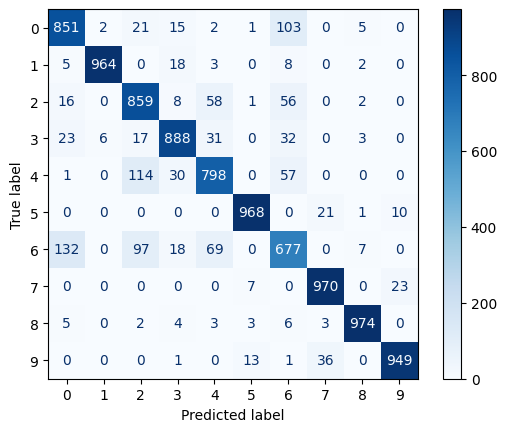

In [53]:
ConfusionMatrixDisplay.from_predictions(
    y_test, y_test_pred,
    cmap='Blues',
    normalize=None
)

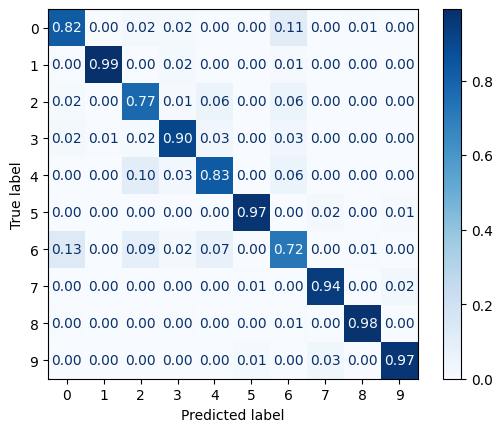

In [56]:
ConfusionMatrixDisplay.from_predictions(
    y_test, y_test_pred,
    cmap='Blues',
    values_format='.2f',
    normalize='pred'
)

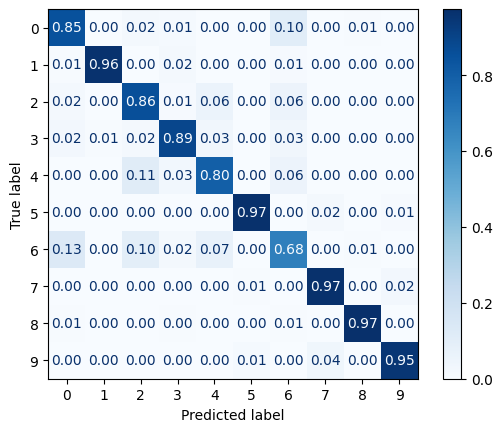

In [57]:
ConfusionMatrixDisplay.from_predictions(
    y_test, y_test_pred,
    cmap='Blues',
    values_format='.2f',
    normalize='true'
)

In [7]:
import cv2
import tensorflow as tf
import matplotlib.pyplot as plt

In [8]:
img = cv2.imread('test.jpg')
img.shape

(905, 640, 3)

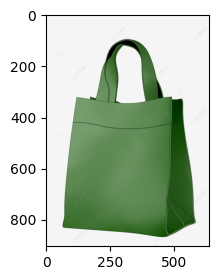

In [9]:
plt.figure(figsize=(3,3))
plt.imshow(img)
plt.show()

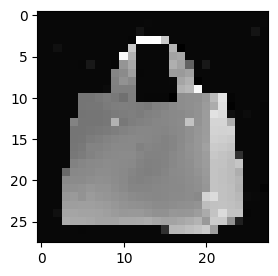

In [10]:
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img_gray = cv2.resize(img_gray, (28, 28))
plt.figure(figsize=(3,3))
plt.imshow(img_gray, cmap=plt.cm.binary)
plt.show()

In [11]:
img_gray = tf.expand_dims(img_gray, axis=0)
img_gray.shape

TensorShape([1, 28, 28])

In [17]:
pred = best_model.predict(img_gray)
print(pred)
pred_value = pred.argmax(axis=1).ravel()[0]
print(pred_value)
print(class_name[pred_value])

1/1 [==============================] - 0s 82ms/step
[[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]
8
Bolso
